In [1]:
# importing libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
diabetes = pd.read_csv('diabetes.csv')

X = diabetes.iloc[:,0:8].values 
Y = diabetes.iloc[:, 8].values

# Splitting the data for problems 1 and 2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state=42)

In [3]:
# Problem 1

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

In [4]:
matrix = confusion_matrix(Y_test, predicted)
report = classification_report(Y_test, predicted)
print('For Problem 1:')
print('')
print("Accuracy: %.3f%%" % (accuracy_score(Y_test, predicted)*100.0))
print("Precision: %.3f%%" % (precision_score(Y_test, predicted)*100.0))
print("Recall: %.3f%%" % (recall_score(Y_test, predicted)*100.0))

For Problem 1:

Accuracy: 75.974%
Precision: 68.000%
Recall: 61.818%


For Problem 1:


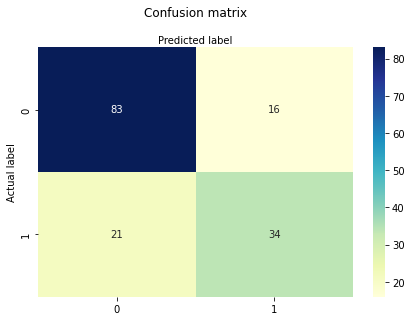

In [5]:
class_names=[0,1] #name of classes
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
print('For Problem 1:')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [6]:
# Problem 2
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test = sc.transform(X_test)

In [7]:
# 5 folds selected
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
metrics = ['accuracy', 'precision', 'recall']
model = LogisticRegression(solver='liblinear')
results = cross_validate(model, X, Y,scoring=metrics, cv=kfold)
print('For Problem 2:')
print('')
print("Accuracy for K=5: %.3f%%" % (results['test_accuracy'].mean()*100.0))
print("Rrecision for K=5: %.3f%%" % (results['test_precision'].mean()*100.0))
print("Recall for K=5: %.3f%%" % (results['test_recall'].mean()*100.0))

For Problem 2:

Accuracy for K=5: 76.437%
Rrecision for K=5: 71.869%
Recall for K=5: 54.344%


In [8]:
# 10 folds selected
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
metrics = ['accuracy', 'precision', 'recall']
model = LogisticRegression(solver='liblinear')
results = cross_validate(model, X, Y,scoring=metrics, cv=kfold)
print('For Problem 2:')
print('')
print("Accuracy for K=10: %.3f%%" % (results['test_accuracy'].mean()*100.0))
print("Rrecision for K=10: %.3f%%" % (results['test_precision'].mean()*100.0))
print("Recall for K=10: %.3f%%" % (results['test_recall'].mean()*100.0))

For Problem 2:

Accuracy for K=10: 77.081%
Rrecision for K=10: 72.567%
Recall for K=10: 55.247%


In [9]:
# Problem 3
# Part 1
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

breast_data = breast.data

In [10]:
breast_input=pd.DataFrame(breast_data)

In [11]:
breast_labels = breast.target

In [12]:
labels = np.reshape(breast_labels,(569,1))

In [13]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [14]:
breast_dataset=pd.DataFrame(final_breast_data)
features = breast.feature_names

In [15]:
features_labels=np.append(features,'label')
breast_dataset.columns=features_labels

In [16]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [17]:
X = breast_dataset.iloc[: , 0:30].values
Y = breast_dataset.iloc[: , 30].values

In [18]:
# Splitting the data for problems 3 and 4
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state=42)

In [19]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

In [20]:
matrix = confusion_matrix(Y_test, predicted)

In [21]:
pos_label =['Benign', 'Malignant']
matrix = confusion_matrix(Y_test, predicted)
report = classification_report(Y_test, predicted)

print('For Problem 3.1:')
print('')
print("Accuracy: %.3f%%" % (accuracy_score(Y_test, predicted)*100.0))
print("Precision: %.3f%%" % (precision_score(Y_test, predicted, pos_label='Benign')*100.0))
print("Recall: %.3f%%" % (recall_score(Y_test, predicted, pos_label='Malignant')*100.0))

For Problem 3.1:

Accuracy: 95.614%
Precision: 97.500%
Recall: 98.592%


For Problem 3.1:


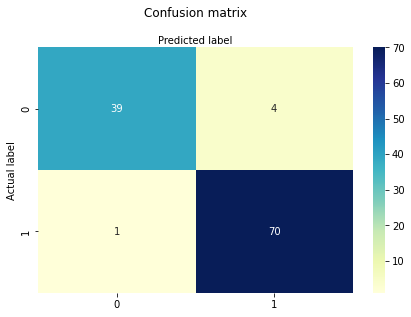

In [22]:
class_names=[0,1] #name of classes
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
print('For Problem 3.1:')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [23]:
# Problem 3
# Part 2
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

breast_data = breast.data

In [24]:
breast_input=pd.DataFrame(breast_data)

breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))

final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset=pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels=np.append(features,'label')
breast_dataset.columns=features_labels

breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [25]:
X = breast_dataset.iloc[: , 0:30].values
Y = breast_dataset.iloc[: , 30].values

In [26]:
# Splitting the data for problems 3 and 4
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state=42)

In [27]:
print('For Problem 3.2:')
print('')
C = [10, 1, .1, .001, .005]
for c in C:
    model = LogisticRegression(penalty='l1',C=c,solver='liblinear',max_iter=1000000)
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    pos_label =['Benign', 'Malignant']
    matrix = confusion_matrix(Y_test, predicted)
    report = classification_report(Y_test, predicted)
    print('C:', c)
    print("Accuracy: %.3f%% " % (accuracy_score(Y_test, predicted)*100.0))
    print("Precision: %.3f%%" % (precision_score(Y_test, predicted, pos_label='Benign')*100.0))
    print("Recall: %.3f%%" % (recall_score(Y_test, predicted, pos_label='Malignant')*100.0))
    print('')

For Problem 3.2:

C: 10
Accuracy: 97.368% 
Precision: 100.000%
Recall: 100.000%

C: 1
Accuracy: 95.614% 
Precision: 97.500%
Recall: 98.592%

C: 0.1
Accuracy: 94.737% 
Precision: 97.436%
Recall: 98.592%

C: 0.001
Accuracy: 91.228% 
Precision: 100.000%
Recall: 100.000%

C: 0.005
Accuracy: 93.860% 
Precision: 100.000%
Recall: 100.000%



In [28]:
# Problem 4
# Part 1
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

breast_data = breast.data

In [29]:
breast_input=pd.DataFrame(breast_data)

breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))

final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset=pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels=np.append(features,'label')
breast_dataset.columns=features_labels

breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [30]:
X = breast_dataset.iloc[: , 0:30].values
Y = breast_dataset.iloc[: , 30].values

In [31]:
# Splitting the data for problems 3 and 4
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

In [32]:
# 5 folds selected
matrix = confusion_matrix(Y_test, predicted)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print('For Problem 4.1:')
print('')
print("Accuracy for K=5: %.3f%%" % (results.mean()*100.0))

For Problem 4.1:

Accuracy for K=5: 94.723%


In [33]:
# 10 folds selected
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print('For Problem 4.1:')
print('')
print("Accuracy for K=10: %.3f%%" % (results.mean()*100.0))

For Problem 4.1:

Accuracy for K=10: 94.897%


In [34]:
# Problem 4
# Part 2
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

breast_data = breast.data

In [35]:
breast_input=pd.DataFrame(breast_data)

breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))

final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset=pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels=np.append(features,'label')
breast_dataset.columns=features_labels

breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [36]:
X = breast_dataset.iloc[: , 0:30].values
Y = breast_dataset.iloc[: , 30].values

In [37]:
# Splitting the data for problems 3 and 4
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

In [38]:
# 5 folds selected
print('For Problem 4.2:')
print('')
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
C=[10, 1, .1, .001, .005]
for c in C:
    model = LogisticRegression(penalty='l1',C=c, solver='liblinear', max_iter=100000)
    results = cross_val_score(model, X, Y, cv=kfold)
    print('C:',c)
    print("Accuracy for K=5: %.3f%%" % (results.mean()*100.0))
    print('')

For Problem 4.2:

C: 10
Accuracy for K=5: 96.479%

C: 1
Accuracy for K=5: 95.249%

C: 0.1
Accuracy for K=5: 93.141%

C: 0.001
Accuracy for K=5: 91.559%

C: 0.005
Accuracy for K=5: 91.913%



In [39]:
# 10 folds selected
print('For Problem 4.2:')
print('')
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
C=[10, 1, .1, .001, .005]
for c in C:
    model = LogisticRegression(penalty='l1',C=c, solver='liblinear',max_iter=100000)
    results = cross_val_score(model, X, Y, cv=kfold)
    print('C:', c)
    print("Accuracy for K=5: %.3f%%" % (results.mean()*100.0))
    print('')

For Problem 4.2:

C: 10
Accuracy for K=5: 95.949%

C: 1
Accuracy for K=5: 95.072%

C: 0.1
Accuracy for K=5: 93.318%

C: 0.001
Accuracy for K=5: 91.557%

C: 0.005
Accuracy for K=5: 91.911%

